In [1]:
## Setting up environments
import os
import json
import numpy as np
import pandas as pds
from copy import deepcopy

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, './')
from Pareto import *
from basics import *

matplotlib.rcParams['font.family'] = "Sans-serif"
matplotlib.rcParams['font.serif'] = "Arial" # Helvetica
matplotlib.rcParams['font.style'] = "normal"
matplotlib.rcParams['font.weight'] = 'light'
matplotlib.rcParams['mathtext.fontset'] = "custom"
matplotlib.rcParams['mathtext.rm'] = "Arial"

# Introduction
1. List of properties and their labels  
   &emsp; Here the properties are listed following the order in Supplementary Table S13 and we list their corresponding variable strings as references.  
   &emsp; <u>*Labels*</u> are property strings which are used in the main text of the paper, while <u>*strings*</u> are variable strings in codes and csv files.  
   &emsp; **Note** that the variable strings for the csv of absolute errors are different from those for the csv of normalized log errors.

2. Display the Pareto front of a pair of properties  
   &emsp; This part follows Figure 4 in section 2.3 of the main text. Construct Pareto fronts and display the benchmarks of properties.

In [3]:
property_string = deepcopy([n for n in property_label_csv['Properties']])
property_label = deepcopy([n for n in property_label_csv['label']])

In [4]:
"""
    Load the datasets of properties
    Here, all data of properties are the errors of MLIP predictions.
"""
absolute_data = pds.read_csv('data/absolute_errors.csv').drop(columns=['Unnamed: 0'])
log_data = pds.read_csv('data/log_errors.csv').drop(columns=['Unnamed: 0'])
norm_log_data = pds.read_csv('data/normalized_log_errors.csv').drop(columns=['Unnamed: 0'])
absolute_data.head()

,Models,ModelName,SelectionType,TrainingData,hex_Ef,spl_Ef,tet_Ef,vac_Ef,spl_c11,spl_c12,...,Vacancy_enhanced_E,Vacancy_enhanced_F,Vacancy_RE_E,Vacancy_RE_F,bulk_free_energy,bulk_entropy,bulk_heat_capacity,vacancy_free_energy,vacancy_entropy,vacancy_heat_capacity
0,DFT,Threshold,NaN,NaN,1.314134,1.243361,0.941977,0.581713,3.176210,4.868190,...,15.000000,0.120000,15.000000,0.173772,0.252635,0.331579,0.114606,39.090915,91.621454,41.022815
1,GAP,183-3,s,Org,1.731683,0.991808,2.008824,0.278863,25.680561,4.682056,...,4.778721,0.092487,5.487769,0.174605,0.117751,0.261441,0.084660,3.302113,4.398669,6.657992
2,GAP,189-5,s,Org,1.857748,0.981382,1.949569,0.282105,27.150928,8.050820,...,4.613906,0.090686,5.326408,0.171139,0.244683,0.450378,0.098215,7.449613,17.745796,7.370485
3,GAP,341-5,r,Org,1.339574,0.715976,1.057594,0.570819,36.488201,6.773480,...,6.903331,0.119578,7.122682,0.199590,0.068068,0.092246,0.117838,38.576201,84.346695,30.701047
4,GAP,58-2,r,Org,0.708142,0.746278,1.310819,0.654595,21.091292,4.222978,...,5.931192,0.105027,6.674811,0.197406,0.121829,0.290714,0.112695,2.803903,9.973107,6.447567


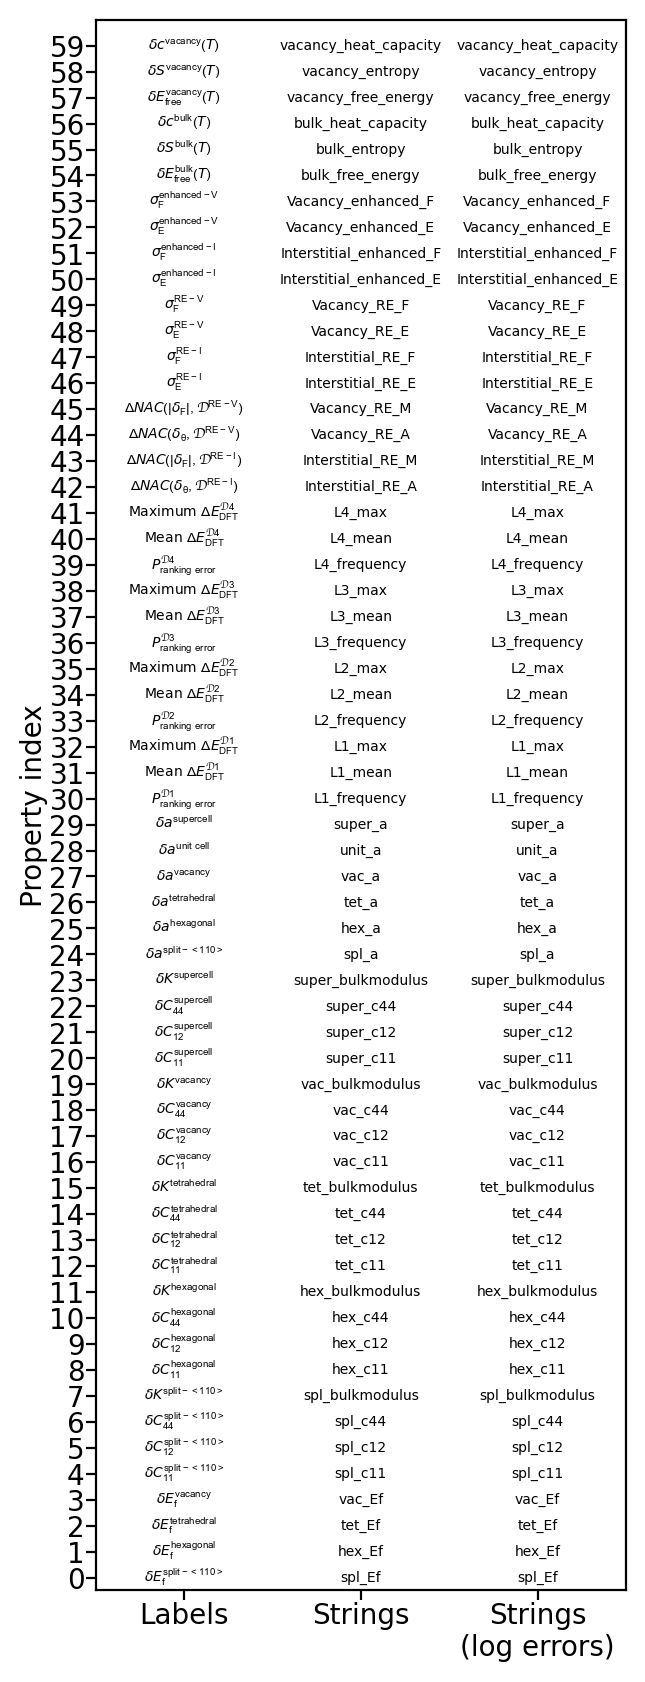

In [6]:
"""
    Here we plot the property labels (used in the main text) and the property strings
    (used in codes and csv files)
"""
log_string = [n for n in log_data.keys()]
split = 1
fig = plt.figure(figsize=(9*0.38, 30*0.34), dpi=200)
ax = plt.subplot(1, 1, 1)
for istr, (s, l) in enumerate(zip(property_string, property_label)):
    ## Find the variable string in the csv file of log errors
    index = [i for i, n in enumerate(log_string) if s.lower()==n.replace('-', '_').lower()][0]
    if s!=log_string[index]:
        print(s, 'differ', log_string[index])
    ax.annotate(s, (split, istr-0.15), color='black', fontsize=5, ha='center') # the variable string
    ax.annotate(r'{}'.format(l), (0, istr-0.15), color='black', fontsize=5, ha='center') # the variable label
    ax.annotate(log_string[index], (2*split, istr-0.15), color='black', fontsize=5, ha='center') # the strings for log file

## Formating the figure
ax.tick_params(axis='both', which='major', labelsize=10, pad=0.5)
ax.set_ylabel('Property index', fontsize=10, labelpad=0.5)
ax.set_xlim(-split/2, 2*split+split/2)
ax.set_ylim(-0.5, 60)
ax.set_xticks([0, split, 2*split])
ax.set_xticklabels(['Labels', 'Strings', 'Strings\n(log errors)'], fontsize=10)
ax.set_yticks([n for n in range(len(property_string))])
ax.set_yticklabels([n for n in range(len(property_string))], fontsize=10)
plt.show()
plt.clf()
plt.close()

In [7]:
"""
    2D scattering plot in Figure 4, section 2.3 with Pareto front
    Property (variable) strings can be found above.
"""
var1 = 'vac_Ef'
var2 = 'hex_c11'

## Get the log errors
## Note that the variable strings in absolute-error csv are differernt from the strings in log-error csv.
index1 = [i for i, n in enumerate(log_string) if var1.lower()==n.replace('-', '_').lower()][0]
index2 = [i for i, n in enumerate(log_string) if var2.lower()==n.replace('-', '_').lower()][0]
str1 = log_string[index1]
str2 = log_string[index2]
data = [(m, n) for m, n in zip(log_data[str1], log_data[str2])]

## Get the labels of variable strings
tmp1 = property_label_csv.loc[property_label_csv['Properties']==var1]
label1 = [n for n in tmp1['label']][0]
tmp2 = property_label_csv.loc[property_label_csv['Properties']==var2]
label2 = [n for n in tmp2['label']][0]

## Check the maximum & minimum values to get the range of plot
dat1 = [n[0] for n in data[1:]] ## the first element is benchmark value
dat2 = [n[1] for n in data[1:]]
min1 = np.floor(min(dat1))-0.05
max1 = np.ceil(max(dat1))+0.05
min2 = np.floor(min(dat2))-0.05
max2 = np.ceil(max(dat2))+0.05

## Get the Pareto front
## the function returns a list of 0 and 1 to show if it's an optimal point
output = is_pareto_efficient(np.array(data[1:]))
pdata = sorted([m for m, n in zip(data[1:], output) if n], key=lambda k: k[0])

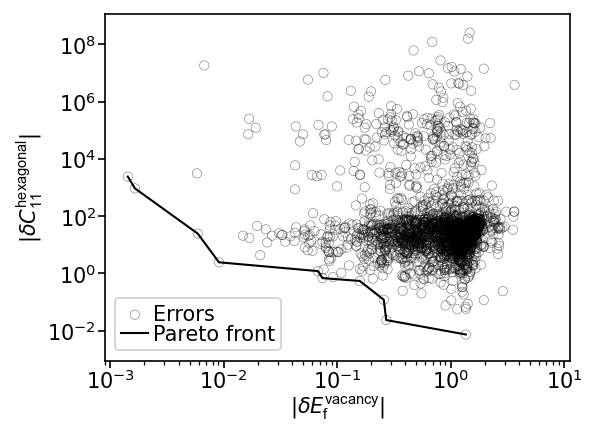

In [8]:
fig = plt.figure(figsize=(4, 3), dpi=150)
ax = plt.subplot(1, 1, 1)

ax.scatter([10**n for n in dat1], [10**n for n in dat2], s=20, facecolor='none',
           edgecolor='black', linewidth=0.3, alpha=0.5, label='Errors')
ax.plot([10**n[0] for n in pdata], [10**n[1] for n in pdata], color='black', linewidth=1,
        label='Pareto front')
ax.semilogx()
ax.semilogy()

## Formating the figure
plt.tick_params(axis='both', which='major', labelsize=10, pad=0.5)
ax.set_xlabel(r'|{}|'.format(label1), fontsize=10, labelpad=0.5)
ax.set_ylabel(r'|{}|'.format(label2), fontsize=10, labelpad=0.5)

ax.set_xlim(10**min1, 10**max1)
ax.set_ylim(10**min2, 10**max2)

lgd = plt.legend(loc='best', fontsize=10, columnspacing=0.4, handlelength=1.3,
                 borderpad=0.3, labelspacing=0, handletextpad=0.2)
plt.show()
plt.clf()
plt.close()